# Naive Bayes

## Naive Bayes Classifier with Scikit-learn

Defining Dataset

In [1]:
# First Feature
weather = [
    'Sunny', 'Sunny',
    'Overcast', 'Rainy',
    'Rainy', 'Rainy',
    'Overcast', 'Sunny',
    'Sunny', 'Rainy',
    'Sunny', 'Overcast',
    'Overcast', 'Rainy'
]

# Second Feature
temp = [
    'Hot', 'Hot',
    'Hot', 'Mild',
    'Cool', 'Cool',
    'Cool', 'Mild',
    'Cool', 'Mild',
    'Mild', 'Mild',
    'Hot', 'Mild'
]

# Label or Target Variable
play = [
    'No', 'No',
    'Yes', 'Yes',
    'Yes', 'No',
    'Yes', 'No',
    'Yes', 'Yes',
    'Yes', 'Yes',
    'Yes', 'No'
]

Encoding Features

In [2]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # bikin instance labelencoder

# Encoding Weather
weather_encoded = le.fit_transform(weather)
print("Weather :", weather_encoded)#, sep='\n')

weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(weather_mapping, '\n')

# Encoding Temperature
temp_encoded = le.fit_transform(temp)
print("Temperature :",temp_encoded)#, sep='\n')

temp_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(temp_mapping, '\n')

# Encoding class/label Play
label = le.fit_transform(play)
print("Play (the label):", label)#, sep='\n')

play_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(play_mapping, '\n')

Weather : [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
{'Overcast': 0, 'Rainy': 1, 'Sunny': 2} 

Temperature : [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
{'Cool': 0, 'Hot': 1, 'Mild': 2} 

Play (the label): [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
{'No': 0, 'Yes': 1} 



In [4]:
# Combining weather and temp into single list of tuple
features = list(zip(weather_encoded, temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

Preparing Machine Learning

In [5]:
# Import Library
from sklearn.naive_bayes import GaussianNB

# Create a GaussianNB Classifier
nb = GaussianNB()

# Train model
nb.fit(features, label)


GaussianNB()

Evaluate the Model

In [6]:
# Predicted Output
# 0: Overcast, 2: Mild
predicted = nb.predict([[0,2]])

print('Predicted value :', predicted)

Predicted value : [1]


## Naive Bayes with Multiple Label

In [7]:
# Import library untuk mengambil data
from sklearn import datasets

# Load dataset wine
wine = datasets.load_wine()

Explore the data

In [8]:
# Nama-nama kolom
print('Features :\n', wine.feature_names)

# Nama-nama label/kelas
print('\nClass :\n', wine.target_names)

Features :
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class :
 ['class_0' 'class_1' 'class_2']


In [9]:
# cek data 5 teratas
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [10]:
# cek data target
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [11]:
# import library for splitting data
from sklearn.model_selection import train_test_split

# split into train sets and test sets
# Train 70%, Test 30%
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, # Data X atau predictors nya
    wine.target, # Data y atau Response nya,
    test_size = .3,
    random_state = 109
)

In [12]:
# import GaussianNB
from sklearn.naive_bayes import GaussianNB

# Create and Train model using Train Sets
nb = GaussianNB().fit(X_train, y_train)

# Predict the response for X_test
y_pred = nb.predict(X_test)

In [13]:
# Import module Metrics for accuracy
from sklearn import metrics

print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9074074074074074


# Decision Tree Classifier

## DTClassifier with Scikit-learn

Load Libraries

In [16]:
import pandas as pd
# DTClassifier
from sklearn.tree import DecisionTreeClassifier

# import train_test_split
from sklearn.model_selection import train_test_split

# Import Metrics calculation
from sklearn import metrics

In [17]:
prefix = '/Users/melawai.it/'
path = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 13/diabetes.csv'

In [19]:
col_names = ['pregrant', 'glucose', 'bp', 
             'skin', 'insulin', 'bmi', 
             'pedigree', 'age', 'label'
            ]

pima = pd.read_csv(path, header=None, names=col_names, skiprows=1)
pima.head()

,pregrant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregrant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
pima.isnull().sum()

pregrant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

Feature Selection

In [23]:
feature_cols = ['pregrant', 'glucose', 'bp', 
             'skin', 'insulin', 'bmi', 
             'pedigree', 'age'
            ]

In [24]:
X = pima[feature_cols]
y = pima['label']

In [26]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size =.3, # Train 70%, Test 30%
    random_state = 1
)

Create and Train Model

In [27]:
# Create Decision Tree Classifier Model
dtc = DecisionTreeClassifier()

# Traim model using Train sets
dtc = dtc.fit(X_train, y_train)

# Predict the response for X_test
y_pred = dtc.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.6883116883116883


### Visualizing Decision Tree

pip install graphviz
pip install pydotplus

In [31]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

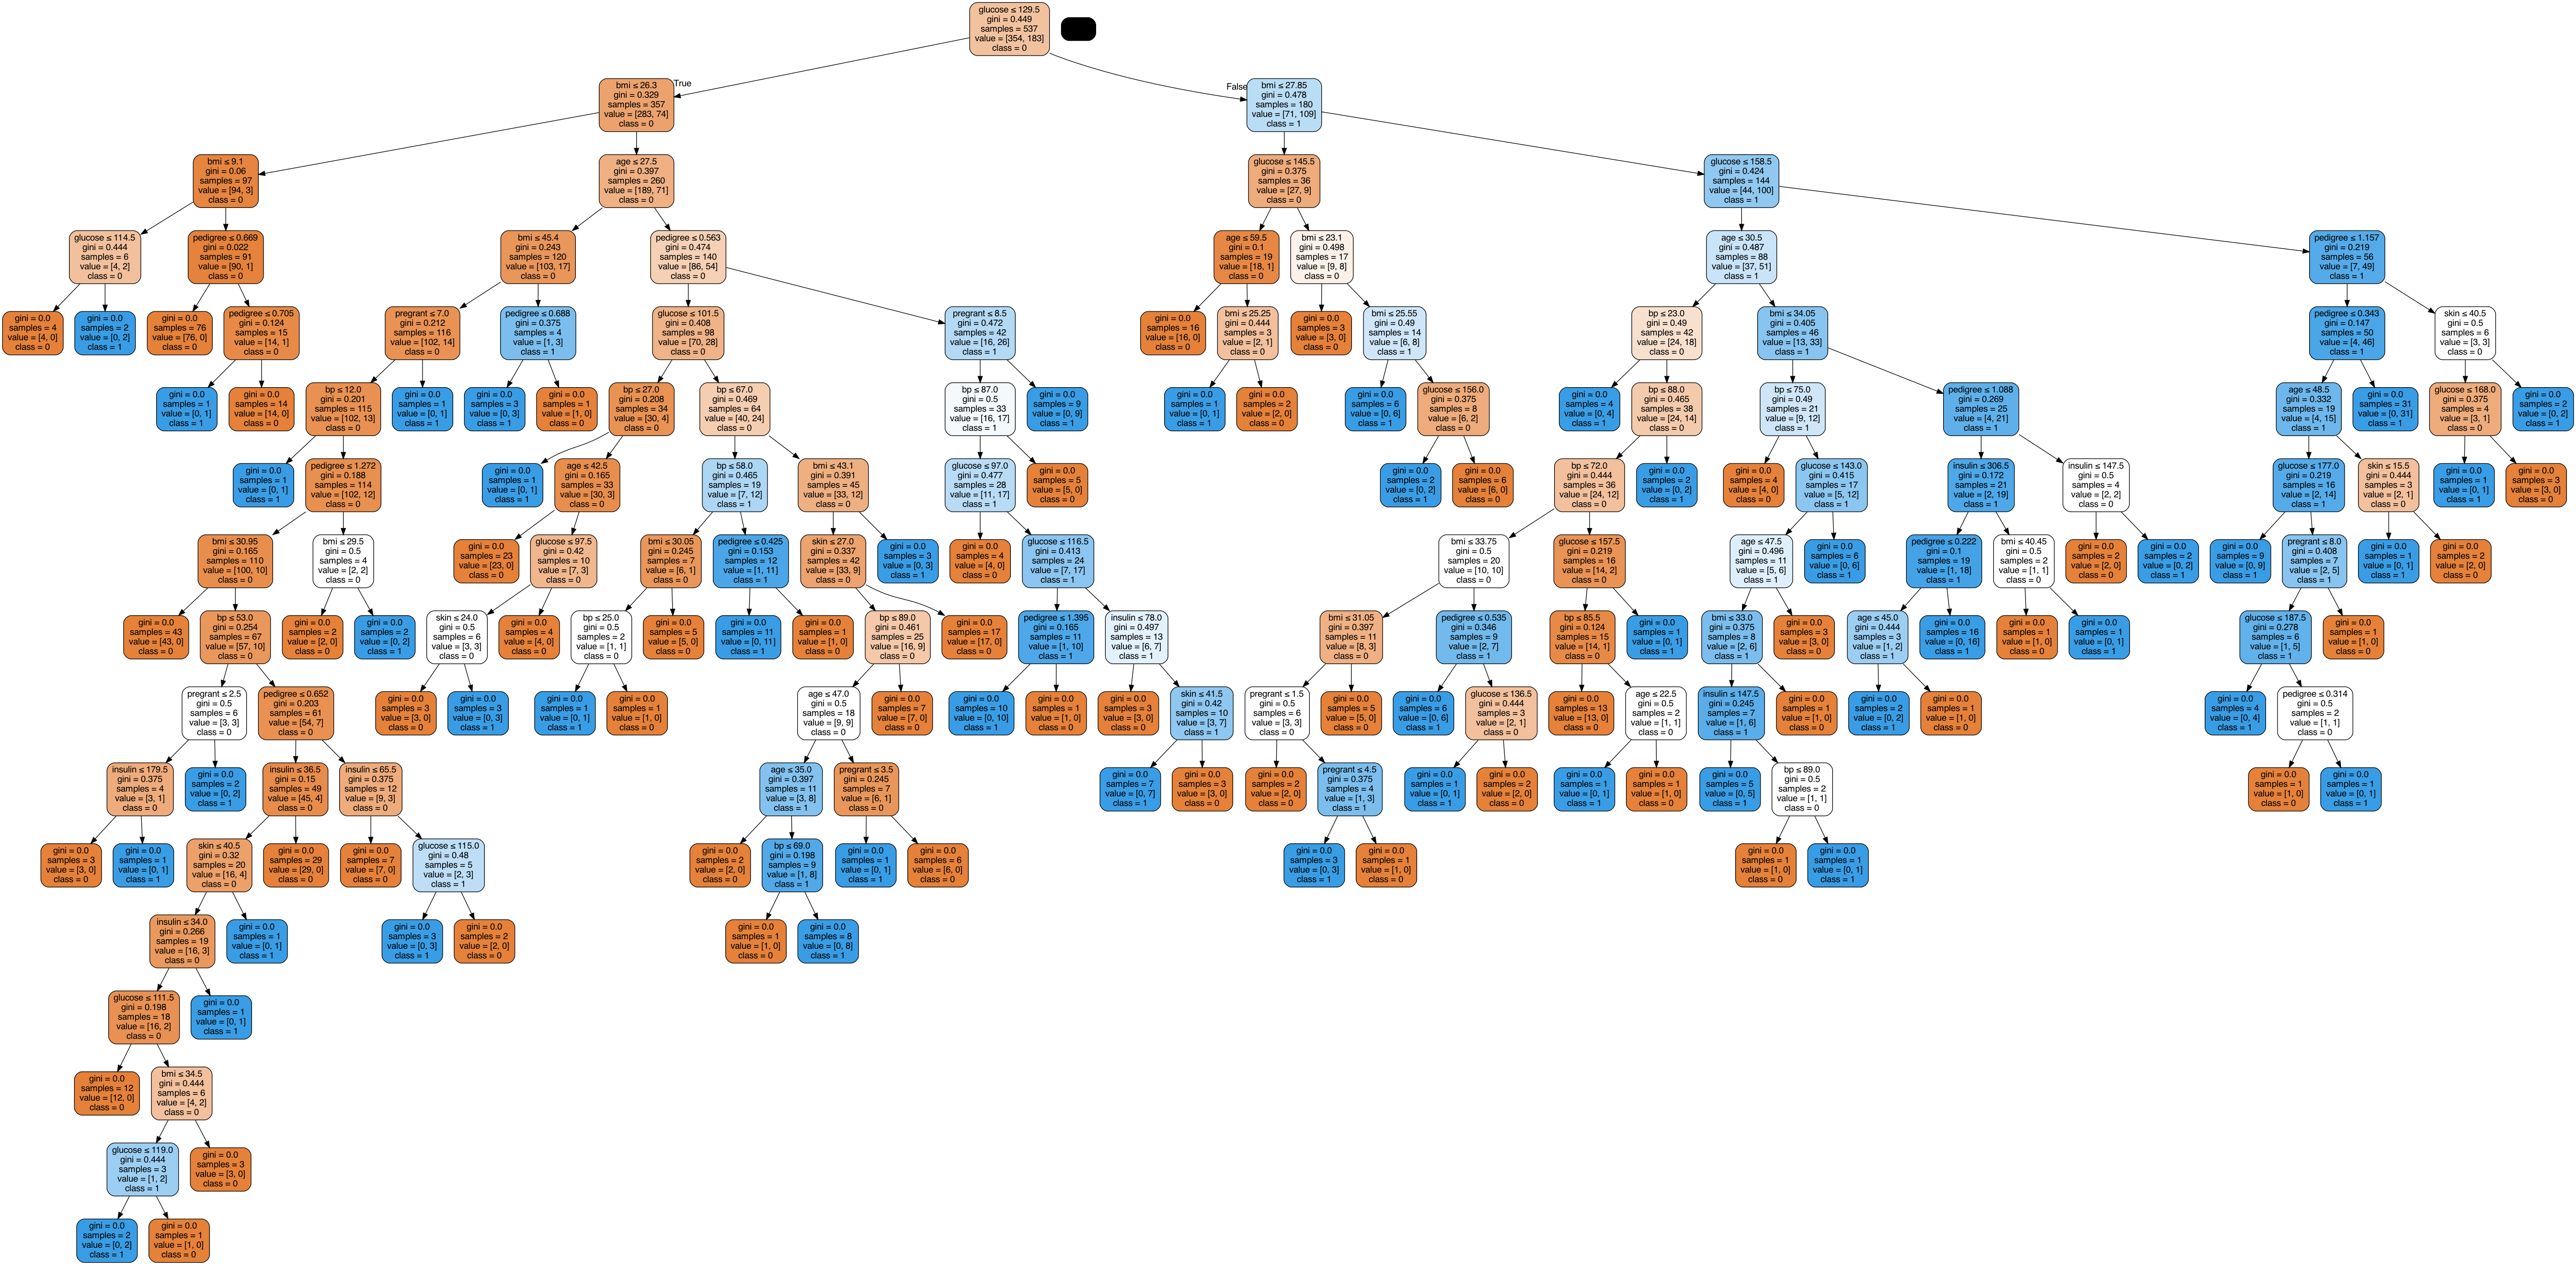

In [33]:
dot_data = StringIO()
tree.export_graphviz(
    dtc,
    out_file = dot_data,
    class_names = ['0','1'], # Target Names
    feature_names = feature_cols,
    filled = True,  # Whether to fill in the boxes with colours
    rounded = True, # Whether to round the corners of the boxes
    special_characters = True
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Optimizing Decision Tree

In [35]:
# Create Model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train using train sets
clf = clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7705627705627706


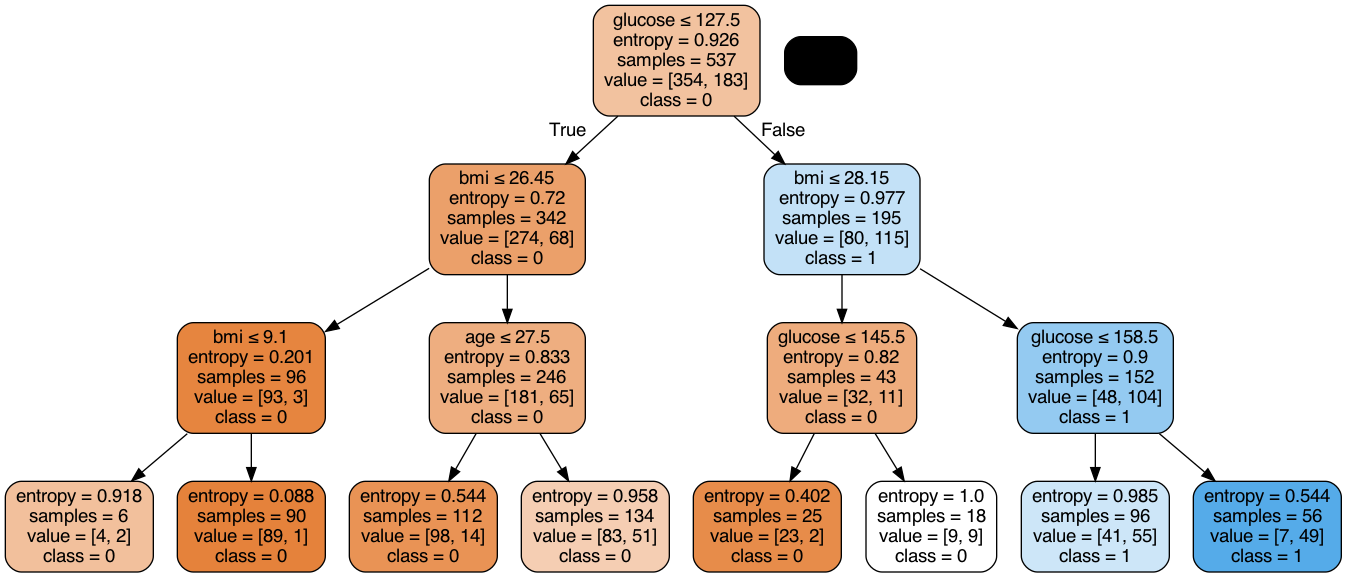

In [36]:
dot_data = StringIO()
tree.export_graphviz(
    clf,
    out_file = dot_data,
    class_names = ['0','1'], # Target Names
    feature_names = feature_cols,
    filled = True,  # Whether to fill in the boxes with colours
    rounded = True, # Whether to round the corners of the boxes
    special_characters = True
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

## Building a classifier using scikit_learn

In [37]:
# import sklearn datasets library
from sklearn import datasets

# load datasets
iris = datasets.load_iris()

In [38]:
# Nama-nama kolom
print(iris.feature_names)

# Nama-nama label species
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [39]:
# cek data 5 teratas
print(iris.data[:5])

# cek nilai label
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [40]:
# Creating dataframe

data = pd.DataFrame({
    'sepal length' : iris.data[:, 0],
    'sepal width' : iris.data[:, 1],
    'petal length' : iris.data[:, 2],
    'petal width' : iris.data[:, 3],
    'species' : iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
# split into train and test set
from sklearn.model_selection import train_test_split

# Features
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
# Target
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .3, # train 70%, test 30%
    random_state = 1
)

In [42]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create Model
rf = RandomForestClassifier(n_estimators=100)

# train using training sets
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

In [43]:
# Import Metrics module
from sklearn import metrics

# Get the Accuracy of the model
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9555555555555556


In [44]:
rf.predict([[3, 5, 4, 2]])

/Users/melawai.it/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

## Finding Importance Features in scikit-learn

In [45]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create Model
rf = RandomForestClassifier(n_estimators=100)

# train using training sets
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
feature_imp = pd.Series(rf.feature_importances_,
                        iris.feature_names
                       ).sort_values(ascending=False)

feature_imp

petal width (cm)     0.444273
petal length (cm)    0.443746
sepal length (cm)    0.082140
sepal width (cm)     0.029840
dtype: float64

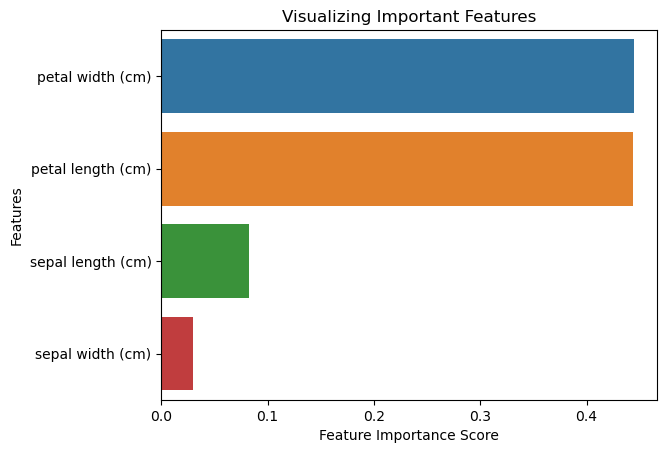

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Barplot
sns.barplot(x=feature_imp,
            y=feature_imp.index
           )
# Add Labels to the Graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

## Generating the model on Selected Features

In [48]:
# split into train and test set
from sklearn.model_selection import train_test_split

# Features
X = data[['sepal length', 'petal length', 'petal width']]
# Target
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .7, # train 30%, test 70%
    random_state = 5
)

In [49]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create Model
rf = RandomForestClassifier(n_estimators=100)

# train using training sets
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Get the Accuracy of the model
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9523809523809523


# SVM

## in Scikit-learn

In [50]:
from sklearn import datasets
# Load the data
cancer = datasets.load_breast_cancer()

Explore data

In [52]:
# Nama-nama fitur
print('Feature :\n', cancer.feature_names)

# nama label tipe kanker
print('\nLabels :\n', cancer.target_names)

Feature :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Labels :
 ['malignant' 'benign']


In [53]:
cancer.data.shape

(569, 30)

In [54]:
# cek data 5 teratas
print(cancer.data[:5])

# cek nilai label
print(cancer.target)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

Splitting Data

In [57]:
# split the data to Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, # X, features
    cancer.target, # y, response
    test_size =.3, # Train 70%, Test 30%,
    random_state=109
)

Generating Model

In [60]:
from sklearn.svm import SVC

# Create Model
svm_ = SVC(kernel='linear') # Linear Kernel

# Train Model using Train sets
svm_.fit(X_train, y_train)

# predict the response X_test
y_pred = svm_.predict(X_test)

Evaluating Model

In [61]:
# Import Metrics module
from sklearn import metrics

# Get the Accuracy of the model
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9649122807017544


In [ ]:
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall :", metrics.recall_score(y_test, y_pred))